In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt

In [49]:
df = pd.read_excel("C:\\Users\\riyag\\Downloads\\Data analyst Data (2).xlsx")

In [50]:
df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [51]:
df.shape


(4894, 16)

In [52]:
df.dtypes

First Name                                                          object
Email ID                                                            object
Quantity                                                             int64
Events                                                              object
Attendee Status                                                     object
College Name                                                        object
How did you come to know about this event?                          object
Specify in "Others" (how did you come to know about this event)     object
Designation                                                         object
Year of Graduation                                                   int64
City                                                                object
CGPA                                                               float64
Experience with python (Months)                                      int64
Family Income            

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,4894.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Year of Graduation,4894.0,2024.176951,1.000180,2023.0,2023.0,2024.0,2025.0,2026.0
CGPA,4894.0,8.038476,1.005184,6.2,7.2,7.9,8.9,9.9
Experience with python (Months),4894.0,5.395586,1.705364,3.0,4.0,5.0,7.0,8.0
Expected salary (Lac),4894.0,13.935635,6.451959,5.0,8.0,13.0,19.0,35.0


In [8]:
df.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Events                                                                0
Attendee Status                                                       0
College Name                                                         15
How did you come to know about this event?                         2216
Specify in "Others" (how did you come to know about this event)    4805
Designation                                                           0
Year of Graduation                                                    0
City                                                                  0
CGPA                                                                  0
Experience with python (Months)                                       0
Family Income                                                   

In [27]:
df['Family Income'].unique()

array(['7 Lakh+', '0-2 Lakh', '5-7 Lakh', '2-5 Lakh'], dtype=object)

# BASIC QUESTIONS

## 1. How many unique students are included in the dataset?

In [10]:
unique_count = df['Email ID'].nunique()
print(unique_count)

2157


## 2. What is the average GPA of the students?

In [11]:
avg=df['CGPA'].mean()
print(avg)

8.038475684511647


## 3. What is the distribution of students across different graduation years?

In [12]:
average_price = df.groupby('Year of Graduation')['Email ID'].count()
print(average_price)

Year of Graduation
2023    1536
2024    1511
2025    1292
2026     555
Name: Email ID, dtype: int64


## 4. What is the distribution of student's experience with Python programming?

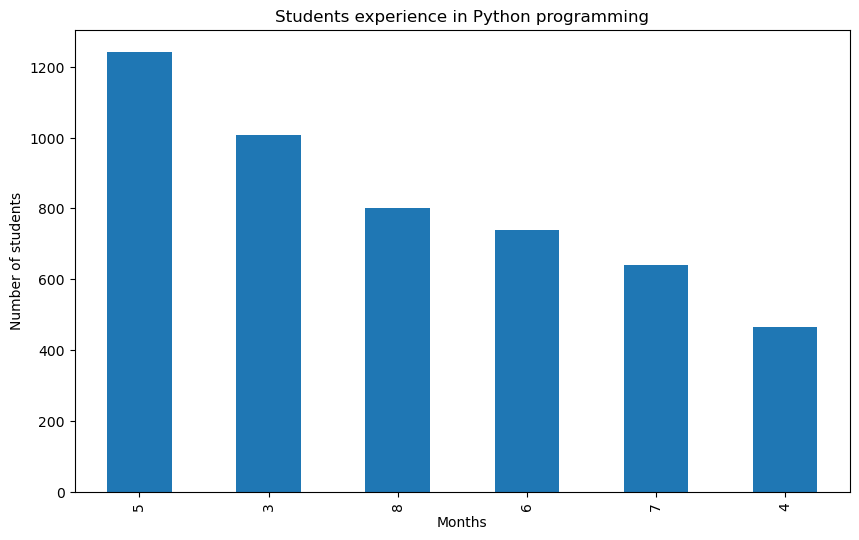

In [13]:
group_counts = df['Experience with python (Months)'].value_counts()
plt.figure(figsize=(10, 6))
group_counts.plot(kind='bar')
plt.title('Students experience in Python programming')
plt.xlabel('Months')
plt.ylabel('Number of students')
plt.xticks(rotation=90)
plt.show()

## 5. What is gthe average Family Income of the student?

In [55]:
df['Family Income'] = df['Family Income'].replace({'7 Lakh+': 1000000,
                                                   '0-2 Lakh': 100000,
                                                   '5-7 Lakh': 600000,
                                                   '2-5 Lakh': 400000})
df['Family Income'] = df['Family Income'].fillna(0)
df['Family Income'] = df['Family Income'].astype(int)
avg = df['Family Income'].mean()
print(f'{avg}')

 136800.16346546792


## 6. How does the GPA vary among different colleges? (show top 5 results only)

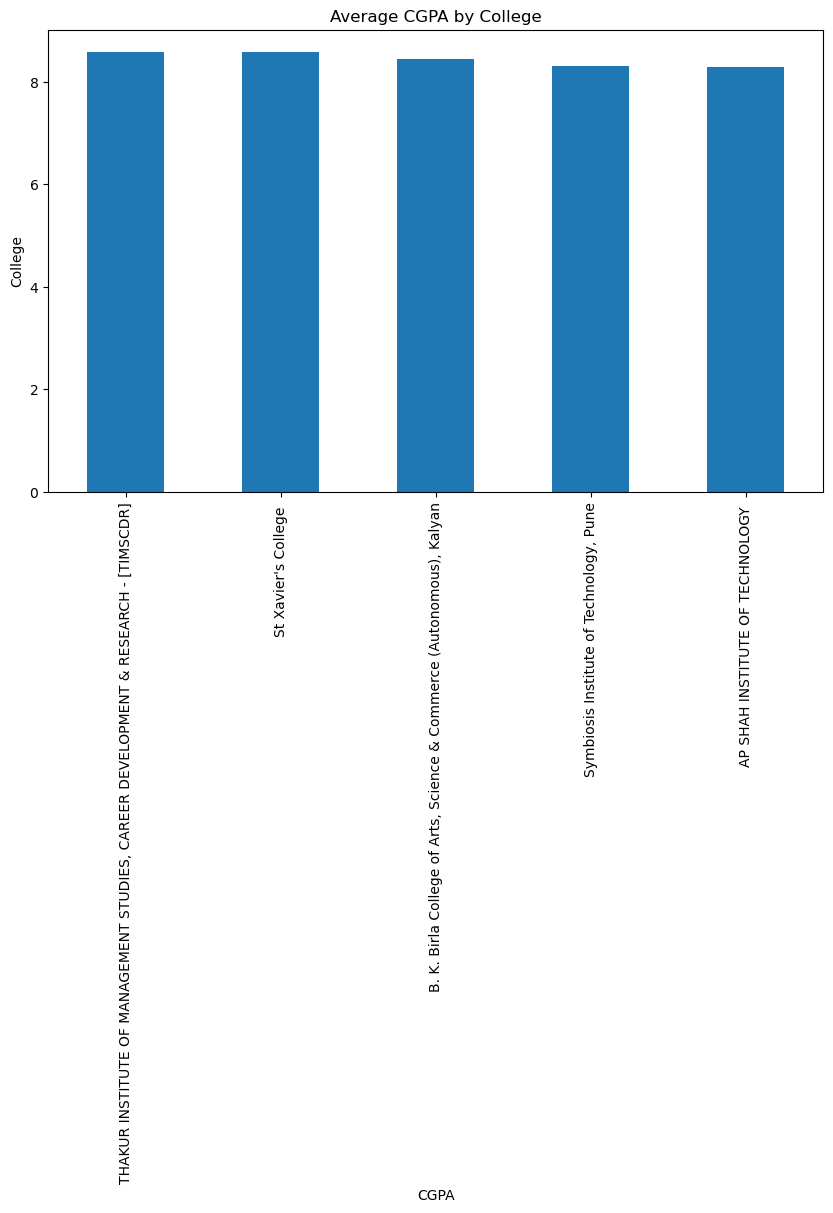

In [14]:
average_gpa_by_college = df.groupby('College Name')['CGPA'].mean().sort_values(ascending=False)
average_gpa_by_college=average_gpa_by_college.head()
plt.figure(figsize=(10, 6))
average_gpa_by_college.plot(kind='bar')
plt.title('Average CGPA by College')
plt.xlabel('CGPA')
plt.ylabel('College')
plt.xticks(rotation=90)
plt.show()

## 7. Are there any outliers in the quantity (number of courses completed) attribute?

In [15]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.0


## 8. What is the average GPA of student from each city?

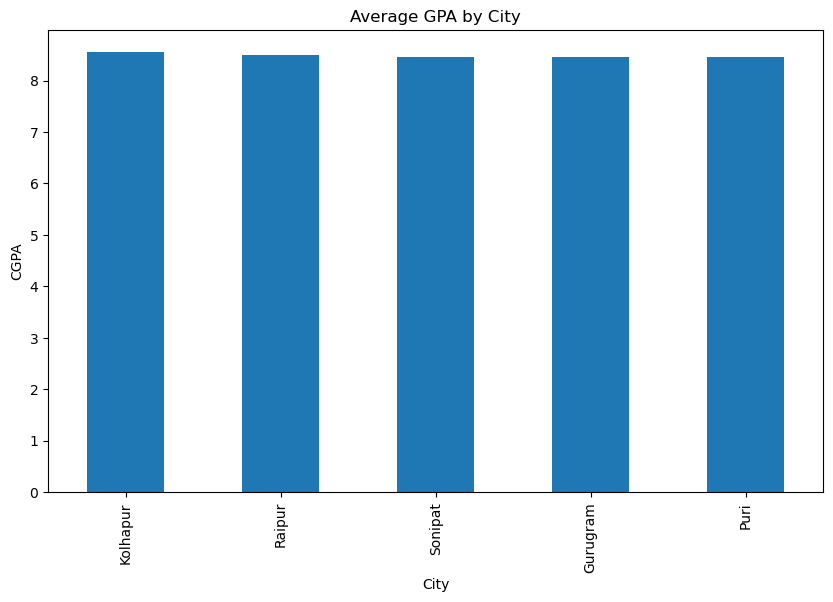

In [16]:
average_gpa_by_college = df.groupby('City')['CGPA'].mean().sort_values(ascending=False)
average_gpa_by_college=average_gpa_by_college.head()
plt.figure(figsize=(10, 6))
average_gpa_by_college.plot(kind='bar')
plt.title('Average GPA by City')
plt.xlabel('City')
plt.ylabel('CGPA')
plt.xticks(rotation=90)
plt.show()

# MODERATE QUESTIONS

## 10. How many students from various cities? (Top 100)

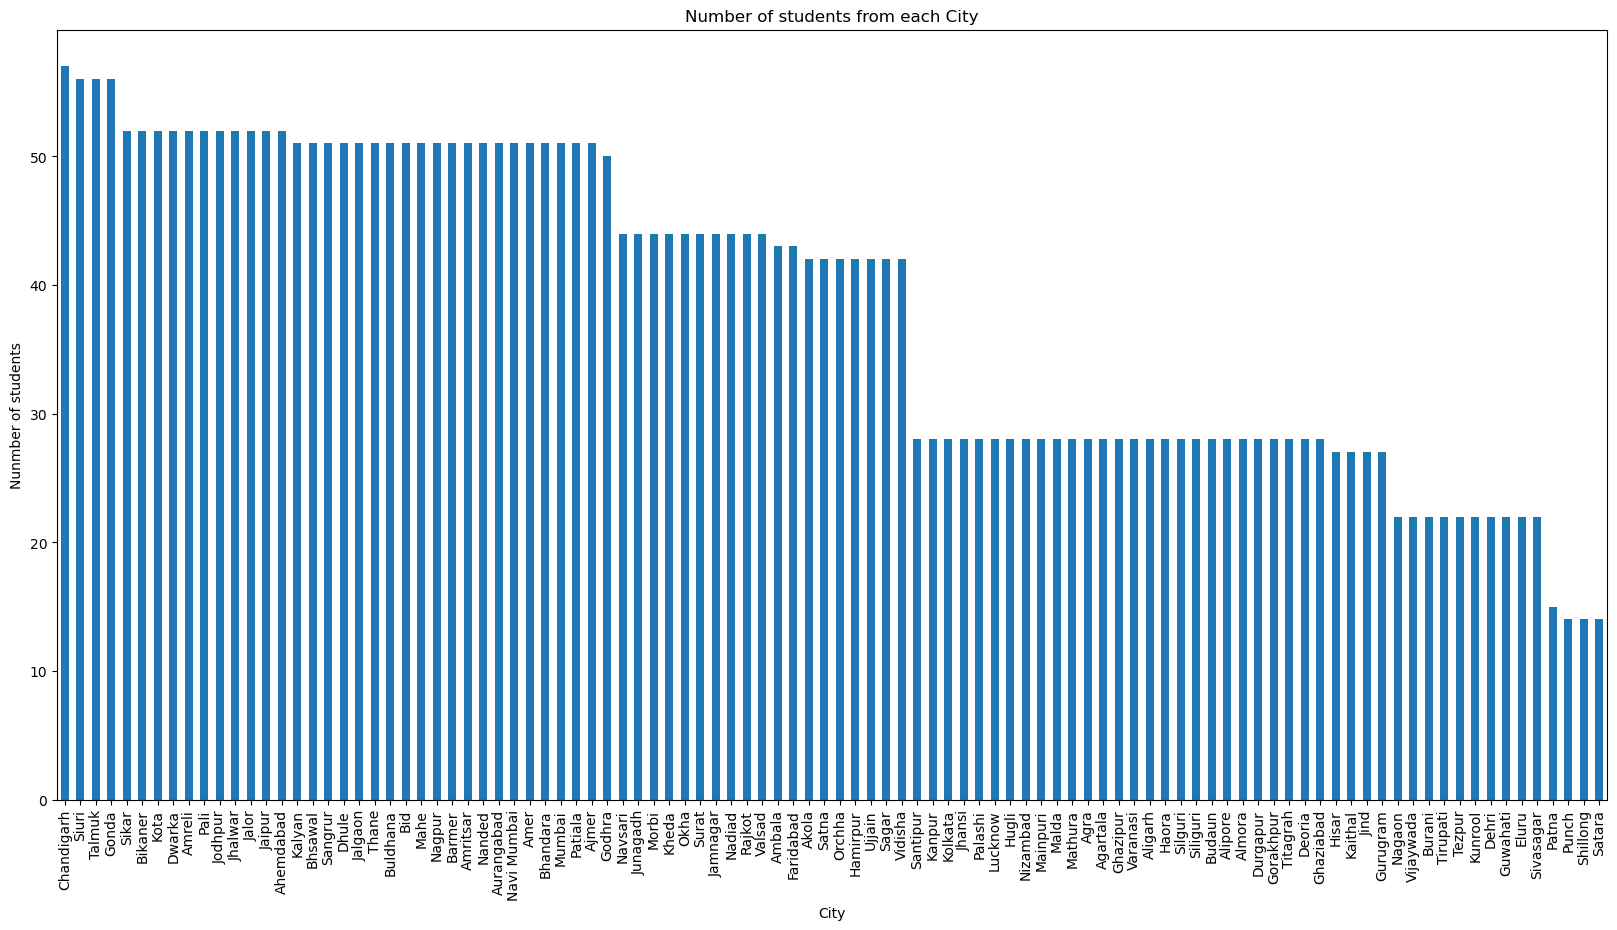

In [17]:
average_gpa_by_college = df.groupby('City')['Email ID'].count().sort_values(ascending=False)
average_gpa_by_college=average_gpa_by_college.head(100)
plt.figure(figsize=(20, 10))
average_gpa_by_college.plot(kind='bar')
plt.title('Number of students from each City')
plt.xlabel('City')
plt.ylabel('Nunmber of students')
plt.xticks(rotation=90)
plt.show()

## 11. How does expected salary vary based on factors like 'GPA', 'Family Income', 'Experience with Python (Months)'?

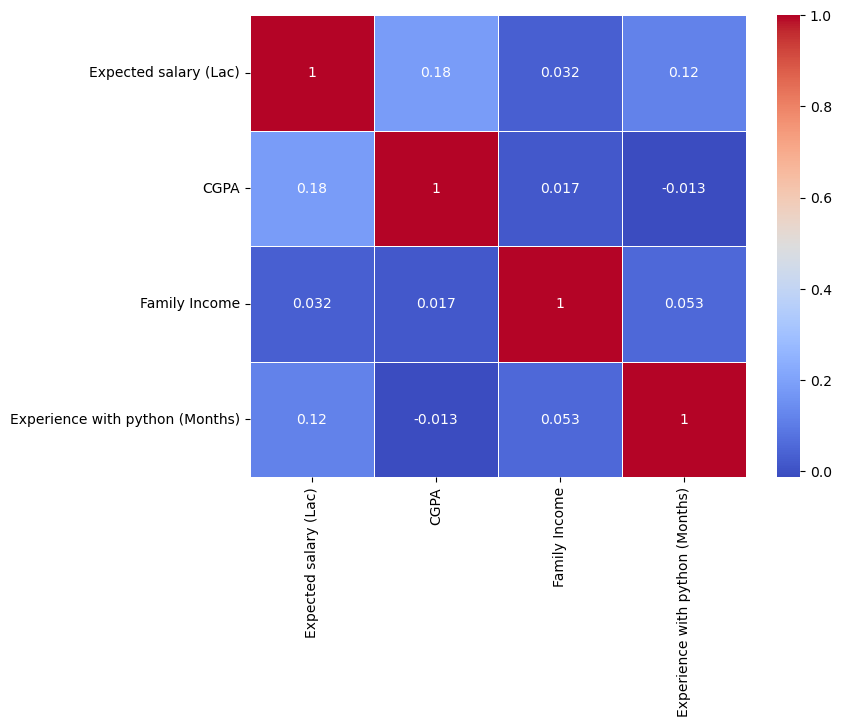

In [62]:
correlation_matrix = df[['Expected salary (Lac)','CGPA','Family Income','Experience with python (Months)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

## 13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

In [18]:
df['Leadership- skills'] = df['Leadership- skills'].str.strip()
average_gpa_by_college = df.groupby('Leadership- skills')['CGPA'].mean()
print(average_gpa_by_college)

Leadership- skills
no     8.039320
yes    8.036787
Name: CGPA, dtype: float64


In [19]:
df['Leadership- skills'] = df['Leadership- skills'].str.strip()
average_gpa_by_college = df.groupby('Leadership- skills')['Expected salary (Lac)'].mean()
print(average_gpa_by_college)

Leadership- skills
no     13.917561
yes    13.971796
Name: Expected salary (Lac), dtype: float64


## 14. How many students are graduating by the end of 2024?

In [20]:
number_of_students = df[df['Year of Graduation']==2024]
students=number_of_students['Email ID'].count()
print(students)

1511


## 15. Which promotion channel brings in more student participations for the event?

In [21]:
df = df.rename(columns={'How did you come to know about this event?': 'How did you hear?'})
df = df.rename(columns={'Specify in "Others" (how did you come to know about this event)': 'specify in others?'})
average_gpa_by_college = df.groupby(['How did you hear?','specify in others?'])['Email ID'].count()
print(average_gpa_by_college)

How did you hear?                                                                                 specify in others? 
Cloud Counselage Website | Others                                                                 College                 2
Email | Others                                                                                    College                 1
Others                                                                                            College                60
                                                                                                  Friends                 7
                                                                                                  From Academy            1
                                                                                                  Institute               1
                                                                                                  Team entity             1
              

## 16. Find the total number of students who attend the events related to Data Science? (from all Data Science related courses)

In [22]:
print(df['Events'].unique())

['Art of Resume Building' 'Data Visualization using Power BI'
 'Artificial Intelligence' 'Hello ML and DL' 'Product Marketing'
 'IAC - Q&A' 'Internship Program(IP) Success Conclave'
 'IS DATA SCIENCE FOR YOU?' 'KYC - Know Your CCPC'
 'Product Design & Full Stack' 'RPA: A Boon or A Bane'
 'Skill and Employability Enhancement'
 'Talk on Skill and Employability Enhancement' 'The Agile Ways of Working'
 'The SDLC & their transformations'
 'Transformation with DevOps: The Easy Way']


In [23]:
filtered_df = df[df['Events'].isin(['Data Visualization using Power BI', 'Artificial Intelligence', 'Hello ML and DL', 'IS DATA SCIENCE FOR YOU?'])]
filtered_df['Email ID'].count()

1148

## 17. Those who have higher CGPA & More experience in language those who had high expectation for salary? (Avg)

In [24]:
avg=df['CGPA'].mean()
avg_df=df[df['CGPA']>avg]
print(avg_df['Expected salary (Lac)'].mean())
print(df['Expected salary (Lac)'].mean())


14.883421985815604
13.935635472006538


In [25]:
avg=df['Experience with python (Months)'].mean()
avg_df=df[df['Experience with python (Months)']>avg]
print(avg_df['Expected salary (Lac)'].mean())
print(df['Expected salary (Lac)'].mean())

14.932966023875116
13.935635472006538


## 18. How many students know about the event from their colleges? Which of these top 5 colleges?

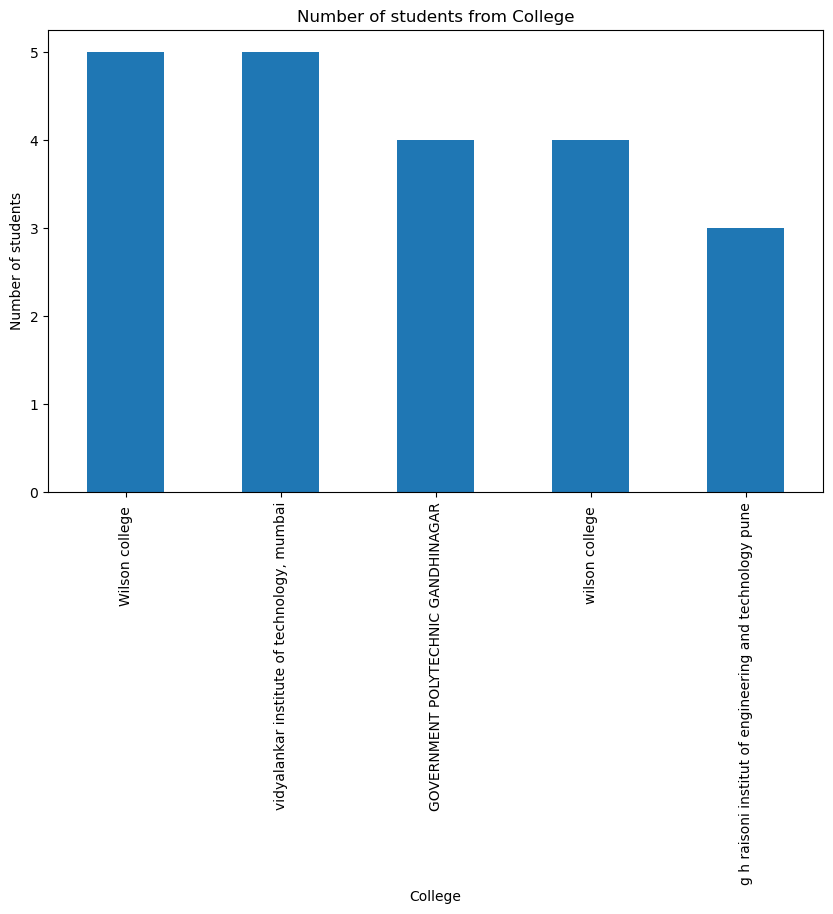

In [26]:
college_df=df[df['specify in others?']=='College']
average_gpa_by_college = college_df.groupby('College Name')['Email ID'].count().sort_values(ascending=False)
average_gpa_by_college=average_gpa_by_college.head()
plt.figure(figsize=(10, 6))
average_gpa_by_college.plot(kind='bar')
plt.title('Number of students from College')
plt.xlabel('College')
plt.ylabel('Number of students')
plt.xticks(rotation=90)
plt.show()